In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
from os.path import basename, join, exists

In [3]:
folder=r"/content/drive/MyDrive/My_projects _and _datasets/Final_work/APTOS/Train/"
total=0
print('---Training set details----')
for sub_folder in os.listdir(folder):
  no_of_images=len(os.listdir(folder + sub_folder))
  total+=no_of_images
  print(str(no_of_images) + " " + sub_folder + " images")

print("Total no. of images ",total)

---Training set details----
1676 with_DR images
1608 without_DR images
Total no. of images  3284


In [4]:
folder=r"/content/drive/MyDrive/My_projects _and _datasets/Final_work/APTOS/Test/"
total=0
print('---Test set details----')
for sub_folder in os.listdir(folder):
  no_of_images=len(os.listdir(folder + sub_folder))
  total+=no_of_images
  print(str(no_of_images) + " " + sub_folder + " images")

print("Total no. of images",total)

---Test set details----
181 with_DR images
197 without_DR images
Total no. of images 378


In [5]:
import numpy as np
np.random.seed(777)
import time
import keras as keras
from keras.layers import GlobalAveragePooling2D
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import decode_predictions
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten
from keras.layers import merge,Input
from keras.models import Model
from keras.utils import np_utils
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import os
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
from keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.applications.vgg19 import VGG19
from keras.applications.xception import Xception
from keras.applications.vgg16 import preprocess_input as pi_vgg16
from keras.applications.inception_v3 import preprocess_input as pi_incep
from tensorflow.keras.applications.resnet50 import preprocess_input as pi_resnet
from keras.applications.vgg19 import preprocess_input as pi_vgg19
from keras.applications.xception import preprocess_input as pi_xcep 
from keras.models import load_model
from numpy import array
from numpy import argmax
from sklearn.metrics import accuracy_score
from  numpy import mean 
from numpy import std
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam,SGD
from keras.callbacks import ReduceLROnPlateau,EarlyStopping,ModelCheckpoint
from keras.layers import GlobalAveragePooling2D, Concatenate
from keras.layers import BatchNormalization,Dropout
from keras.layers import Lambda
from keras.regularizers import l2
import math
from keras import backend as K
from keras.metrics import categorical_accuracy
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
from keras.models import load_model
from tensorflow.keras.utils import to_categorical

In [6]:
img_height =224
img_width = 224
batch_size =32
input_shape = (img_width, img_height, 3)

In [7]:
print("-----------------Image Augmentation for VGG16--------------")

random_seed = np.random.seed(1142)
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    featurewise_center=True,
    featurewise_std_normalization=True,
    validation_split= 0.2,
    zoom_range=0.2)
    #shear_range=0.2)

train_generator_vgg16 = train_datagen.flow_from_directory(
    "/content/drive/MyDrive/My_projects _and _datasets/Final_work/APTOS/Train/",
    target_size=(img_height, img_width),
    batch_size=batch_size,
    seed = random_seed,
    shuffle=False,
    subset = 'training',
    class_mode='binary')

val_generator_vgg16 = train_datagen.flow_from_directory(
    "/content/drive/MyDrive/My_projects _and _datasets/Final_work/APTOS/Train/",
    target_size=(img_height, img_width),
    batch_size=batch_size,
    seed = random_seed,
    shuffle=False,
    subset = 'validation',
    class_mode='binary')
test_datagen=ImageDataGenerator(rescale=1./255)
test_generator_vgg16=test_datagen.flow_from_directory("/content/drive/MyDrive/My_projects _and _datasets/Final_work/APTOS/Test/",
                                                      target_size=(img_height, img_width),
                                                          batch_size=batch_size, 
                                                          seed=random_seed,
                                                          shuffle=False,
                                                          class_mode='binary') # set as training data

-----------------Image Augmentation for VGG16--------------
Found 2628 images belonging to 2 classes.
Found 656 images belonging to 2 classes.
Found 378 images belonging to 2 classes.


In [8]:
nb_train_samples = len(train_generator_vgg16.filenames)
nb_validation_samples = len(val_generator_vgg16.filenames)
predict_size_train = int(math.ceil(nb_train_samples / batch_size))
predict_size_validation = int(math.ceil(nb_validation_samples / batch_size))

nb_test_samples = len(test_generator_vgg16.filenames)
predict_size_test = int(math.ceil(nb_test_samples / batch_size))
print(nb_train_samples)
print(nb_validation_samples)
print(nb_test_samples)
print(predict_size_train)
print(predict_size_validation)
print(predict_size_test)

2628
656
378
83
21
12


In [9]:
model_name="VGG16"
model = VGG16(include_top=False, weights="imagenet",pooling='avg',input_tensor=Input(shape=input_shape))
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [10]:
for i, layer in enumerate(model.layers):
    print(i, layer.name)

0 input_1
1 block1_conv1
2 block1_conv2
3 block1_pool
4 block2_conv1
5 block2_conv2
6 block2_pool
7 block3_conv1
8 block3_conv2
9 block3_conv3
10 block3_pool
11 block4_conv1
12 block4_conv2
13 block4_conv3
14 block4_pool
15 block5_conv1
16 block5_conv2
17 block5_conv3
18 block5_pool
19 global_average_pooling2d


In [11]:
image_input =model.input
x1 = GlobalAveragePooling2D()(model.get_layer("block2_conv1").output)  
x2 = GlobalAveragePooling2D()(model.get_layer("block4_conv1").output)  
x3 = GlobalAveragePooling2D()(model.get_layer("block5_conv1").output)  
out= Concatenate()([x1,x2,x3])
custom_vgg16_model = Model(image_input , out)
custom_vgg16_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 224, 224, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv2 (Conv2D)          (None, 224, 224, 64  36928       ['block1_conv1[0][0]']           
                                )                                                             

In [12]:
for i, layer in enumerate(custom_vgg16_model.layers):
    print(i, layer.name)

0 input_1
1 block1_conv1
2 block1_conv2
3 block1_pool
4 block2_conv1
5 block2_conv2
6 block2_pool
7 block3_conv1
8 block3_conv2
9 block3_conv3
10 block3_pool
11 block4_conv1
12 block4_conv2
13 block4_conv3
14 block4_pool
15 block5_conv1
16 global_average_pooling2d_1
17 global_average_pooling2d_2
18 global_average_pooling2d_3
19 concatenate


In [13]:
for layer in custom_vgg16_model.layers[:15]:
    layer.trainable = False
custom_vgg16_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 224, 224, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv2 (Conv2D)          (None, 224, 224, 64  36928       ['block1_conv1[0][0]']           
                                )                                                             

In [14]:
bottleneck_features_train = custom_vgg16_model.predict_generator(train_generator_vgg16, predict_size_train)
np.save('/content/drive/MyDrive/My_projects _and _datasets/IDRID_detection/'+'bottleneck_features_train_'+model_name+'.npy', bottleneck_features_train)

In [15]:
bottleneck_features_validation = custom_vgg16_model.predict_generator(val_generator_vgg16, predict_size_validation)
np.save('/content/drive/MyDrive/My_projects _and _datasets/IDRID_detection/'+'bottleneck_features_validation_'+model_name+'.npy', bottleneck_features_validation)

In [16]:
bottleneck_features_test = custom_vgg16_model.predict_generator(test_generator_vgg16, predict_size_test)
np.save("/content/drive/MyDrive/My_projects _and _datasets/IDRID_detection/"+'bottleneck_features_test_'+model_name+'.npy', bottleneck_features_test)

In [17]:
train_data=np.load('/content/drive/MyDrive/My_projects _and _datasets/IDRID_detection/bottleneck_features_train_VGG16.npy')
validation_data=np.load('/content/drive/MyDrive/My_projects _and _datasets/IDRID_detection/bottleneck_features_validation_VGG16.npy')
test_data = np.load('/content/drive/MyDrive/My_projects _and _datasets/IDRID_detection/bottleneck_features_test_VGG16.npy')

In [18]:
print(train_data.shape)
print(validation_data.shape)
print(test_data.shape)

(2628, 1152)
(656, 1152)
(378, 1152)


In [19]:
train_labels=train_generator_vgg16.classes
train_labels=train_labels = to_categorical(train_labels, num_classes=2)
validation_labels=val_generator_vgg16.classes
validation_labels = to_categorical(validation_labels, num_classes=2)
test_labels=test_generator_vgg16.classes
test_labels=to_categorical(test_labels,num_classes=2)

In [20]:
print(train_labels.shape)
print(validation_labels.shape)
print(test_labels.shape)

(2628, 2)
(656, 2)
(378, 2)


In [21]:
model = Sequential()
model.add(Dense(112,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2,activation='sigmoid'))
adam_opt2=Adam(lr = 0.001, beta_1=0.6, beta_2=0.8, amsgrad=True)

model.compile(optimizer=adam_opt2, loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, train_labels,
                    epochs=1000,
                    batch_size=batch_size,
                    validation_data=(validation_data, validation_labels),
                    verbose= 1)

Epoch 1/1000
83/83 [==============================] - 1s 8ms/step - loss: 0.6127 - accuracy: 0.7778 - val_loss: 0.3061 - val_accuracy: 0.9070
Epoch 2/1000
83/83 [==============================] - 0s 5ms/step - loss: 0.3441 - accuracy: 0.8786 - val_loss: 0.2186 - val_accuracy: 0.9405
Epoch 3/1000
83/83 [==============================] - 0s 5ms/step - loss: 0.3010 - accuracy: 0.9007 - val_loss: 0.2024 - val_accuracy: 0.9345
Epoch 4/1000
83/83 [==============================] - 0s 5ms/step - loss: 0.2662 - accuracy: 0.9106 - val_loss: 0.1686 - val_accuracy: 0.9451
Epoch 5/1000
83/83 [==============================] - 0s 5ms/step - loss: 0.2580 - accuracy: 0.9182 - val_loss: 0.1599 - val_accuracy: 0.9497
Epoch 6/1000
83/83 [==============================] - 0s 5ms/step - loss: 0.2458 - accuracy: 0.9163 - val_loss: 0.1942 - val_accuracy: 0.9543
Epoch 7/1000
83/83 [==============================] - 0s 5ms/step - loss: 0.2426 - accuracy: 0.9182 - val_loss: 0.1510 - val_accuracy: 0.9558
Epoch 

In [22]:
preds = model.predict(validation_data)
predictions = [i.argmax() for i in preds]
y_true = [i.argmax() for i in validation_labels]
print('Accuracy {}'.format(accuracy_score(y_true=y_true, y_pred=predictions)))

Accuracy 0.9832317073170732


In [23]:
preds = model.predict(test_data)

predictions = [i.argmax() for i in preds]
y_true = [i.argmax() for i in test_labels]
#cm = confusion_matrix(y_pred=predictions, y_true=y_true)

print('Accuracy {}'.format(accuracy_score(y_true=y_true, y_pred=predictions)))

Accuracy 0.9814814814814815


In [24]:
model.save('/content/drive/MyDrive/My_projects _and _datasets/IDRID_detection/vgg16_upto15frozen.h5')
model.save_weights('/content/drive/MyDrive/My_projects _and _datasets/IDRID_detection/vgg16_upto15frozen_weights.h5')

In [25]:
loaded_model=load_model('/content/drive/MyDrive/My_projects _and _datasets/IDRID_detection/vgg16_upto15frozen.h5',compile=False)
loaded_model.load_weights('/content/drive/MyDrive/My_projects _and _datasets/IDRID_detection/vgg16_upto15frozen_weights.h5')

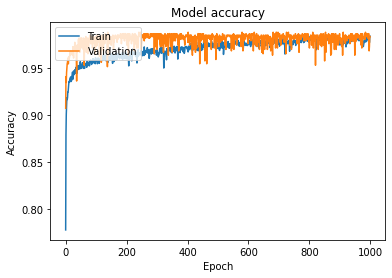

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper left')
plt.show()

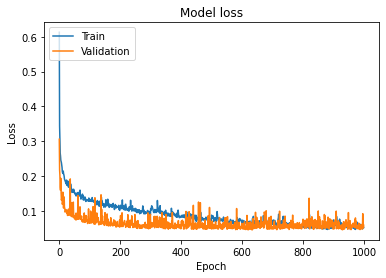

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper left')
plt.show()

In [28]:
train_labels=train_generator_vgg16.classes
train_labels=train_labels = to_categorical(train_labels, num_classes=2)
validation_labels=val_generator_vgg16.classes
validation_labels = to_categorical(validation_labels, num_classes=2)
test_labels=test_generator_vgg16.classes
test_labels=to_categorical(test_labels,num_classes=2)

In [29]:
validation_data=np.load('/content/drive/MyDrive/My_projects _and _datasets/IDRID_detection/bottleneck_features_validation_VGG16.npy')
test_data=np.load('/content/drive/MyDrive/My_projects _and _datasets/IDRID_detection/bottleneck_features_test_VGG16.npy')

In [30]:
preds = loaded_model.predict(validation_data)
predictions = [i.argmax() for i in preds]
y_true = [i.argmax() for i in validation_labels]
print('Accuracy {}'.format(accuracy_score(y_true=y_true, y_pred=predictions)))

Accuracy 0.9832317073170732


In [31]:
from sklearn.metrics import confusion_matrix, classification_report 
import seaborn as sns
import pandas as pd

In [32]:
preds = loaded_model.predict(test_data)

y_pred = [i.argmax() for i in preds]
y_true = [i.argmax() for i in test_labels]
cm = confusion_matrix(y_pred=y_pred, y_true=y_true)

print('Test Accuracy={}'.format(accuracy_score(y_true=y_true, y_pred=y_pred)))

Test Accuracy=0.9814814814814815


CONFUSION MATRIX


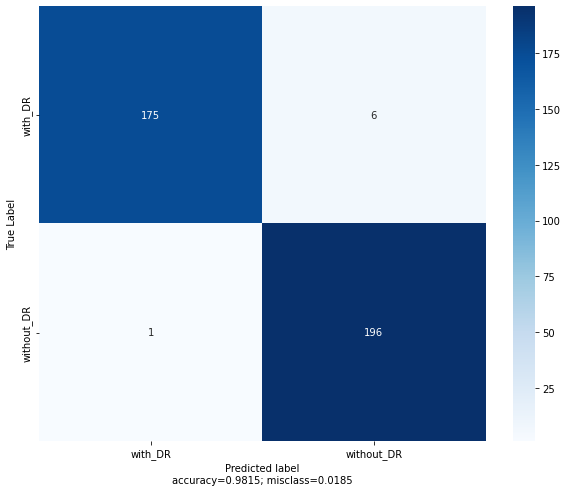

The details for confusion matrix is =
              precision    recall  f1-score   support

     with_DR       0.99      0.97      0.98       181
  without_DR       0.97      0.99      0.98       197

    accuracy                           0.98       378
   macro avg       0.98      0.98      0.98       378
weighted avg       0.98      0.98      0.98       378



In [33]:
print('CONFUSION MATRIX')
conf_matrix = pd.DataFrame(data = cm,  
                           columns = ['with_DR','without_DR'],  
                           index =['with_DR','without_DR']) 

accuracy = np.trace(cm) / float(np.sum(cm))
misclass = 1 - accuracy
plt.figure(figsize = (10,8)) 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Blues") 
plt.ylabel('True Label')
plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
plt.show() 

target_names=['with_DR','without_DR']
print('The details for confusion matrix is =') 
print (classification_report(y_true, y_pred,target_names=target_names))

In [34]:
sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity*100 )

Specificity = cm[1,1]/(cm[1,1]+cm[0,1])
print('Specificity : ', Specificity*100 )

Sensitivity :  99.43181818181817
Specificity :  97.02970297029702
